<a href="https://colab.research.google.com/github/19990715/demo1/blob/main/demo1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install akshare

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 919 kB 8.0 MB/s 
     |████████████████████████████████| 5.4 MB 12.8 MB/s 
     |████████████████████████████████| 54 kB 1.3 MB/s 
     |████████████████████████████████| 47 kB 4.5 MB/s 
     |████████████████████████████████| 1.3 MB 41.7 MB/s 
     |████████████████████████████████| 128 kB 47.4 MB/s 
     |████████████████████████████████| 138 kB 57.2 MB/s 
     |████████████████████████████████| 96 kB 2.6 MB/s 
     |████████████████████████████████| 127 kB 45.2 MB/s 
  Created wheel for jsonpath: filename=jsonpath-0.82-py3-none-any.whl size=5613 sha256=70452b921902da434bd5027bffd708755efe00f0f474eb741a7409743967688d
  Stored in directory: /root/.cache/pip/wheels/93/96/be/f88ab62b037a115c856324fd87a04b97807069a229560add06
Successfully built jsonpath
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling ur

In [ ]:
import akshare as ak
import pandas as pd
l = ak.stock_us_spot_em()
#stock_us_hist_df = ak.stock_us_hist(symbol='105.MTP', period="daily", start_date="19700101", end_date="22220101", adjust="qfq")
#print(stock_us_hist_df)
#print(l)



In [ ]:
#l.to_json('1.json')
#l = american_stock_df[:5]
american_stock_df = pd.DataFrame()
american_stock_df['stock_name'] = l['名称']
american_stock_df['stock_code'] = l['代码']
american_stock_df['current_price'] = l['最新价']
american_stock_df['udprices'] = l['涨跌额']
american_stock_df['highest_price'] = l['最高价']
american_stock_df['lowest_price'] = l['最低价']
american_stock_df['volume'] = l['成交量']
american_stock_df['turnover'] = l['成交额']
#american_stock_df.set_index('stock code',inplace = True)
american_stock_df.shape

(12532, 8)

In [ ]:
american_stock_df.to_csv('american_stock.csv')
from google.colab import files
files.download('american_stock.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
import numpy as np
time_start = time.time() 
df_a=pd.read_csv('stock2.csv')
a = df_a[df_a.name == 'Apple'].index.tolist()[0]
a_code = df_a['code'][a]
print(a_code)
#print(df_a.loc['Apple','AAPL'])
time_end = time.time() 
t = time_end - time_start
print(t)

AAPL
0.033377647399902344


In [ ]:
df_a.dropna(axis=0, how='any', inplace=True)
df_a.shape

(11215, 8)

In [ ]:
a =  df_a['stock_name'].tolist()
if 'Apple' in a:
  print('1')
else:
  print('a')

1


In [ ]:
ll = []
import re
rule = re.compile('^[0-9a-zA-z]{1}.*$')
for i in df_a['stock_name']:
  if rule.match(i) is None:
    ll.append("na")
  else:
    ll.append('n')


In [ ]:
import pandas as pd
import numpy as np
df_a=pd.read_csv('a_stock.csv')
for code in df_a['stock_code']:
  nc = re.sub(r'[0-9]+', '', code)

df_a.shape

(9138, 9)

In [ ]:
df_a.shape

(9137, 7)

In [ ]:
len(df_a['current_price'])

9137

In [ ]:
#计算股票间对数收益率

import pandas as pd
import numpy as np
import math

l= 9137

df_a['index'] = [1]* l
df_a['next_close'] = df_a.groupby('index')['current_price'].shift(-1)


#df_a = df_a.drop(index=df_a.index[-1])
logreturn = list()
for i in df_a.index:
      logreturn.append(math.log(df_a['next_close'][i]/df_a['current_price'][i]))
df_a['logreturn'] = logreturn
   #stock.to_csv("financial_data\\price_logreturn\\"+l,index=False)

df_a

,stock_name,stock_code,current_price,highest_price,lowest_price,volume,turnover,index,next_close,logreturn
0,Ocean Bio-Chem Inc,OBCI,12.86,13.00,12.80,659959.0,8476811.0,1,1.00,-2.554122
1,NextPlat Corp Wt,NXPLW,1.00,1.83,1.00,4206.0,5353.0,1,0.18,-1.714798
2,East Resources Acquisition Co W,ERESW,0.18,0.23,0.16,393990.0,78691.0,1,0.04,-1.504077
3,Enjoy Technology Inc Wt,ENJYW,0.04,0.04,0.03,2333.0,79.0,1,0.13,1.178655
4,Mercury Ecommerce Acquisition C,MEACW,0.13,0.18,0.10,4502.0,562.0,1,0.40,1.123930
...,...,...,...,...,...,...,...,...,...,...
9132,Isleworth Healthcare Acquisitio,ISLEW,0.05,0.05,0.05,150.0,7.0,1,0.01,-1.609438
9133,Electric Last Mile Solutions In,ELMSW,0.01,0.03,0.01,491614.0,5125.0,1,2.85,5.652489
9134,Athira Pharma Inc,ATHA,2.85,3.10,2.53,22040882.0,61810116.0,1,1.96,-0.374375
9135,22nd Century Group Inc,XXII,1.96,2.32,1.65,21187185.0,43653546.0,1,708.25,5.889853


In [ ]:
df_al = df_a[['stock_name','logreturn','lowest_price','highest_price','volume','turnover']]

#df_al = df_a['logreturn']
s = df_al.T
s.to_csv('stock.csv')
from google.colab import files
files.download('stock.csv')

In [ ]:
import numpy as np
import pandas as pd
'''
df_al = df_a[['logreturn','lowest_price','highest_price','volume','turnover']]

#df_al = df_a['logreturn']
s = df_al.T
s.to

#result = df_al.corr.value()
#corr = df_al.corr
#df_a['corr']=corr
#print(type(corr))
#s_df = df_al.astype(np.float64)
#type(s_df)
#la = df_a['stock_name'].tolist()
#print(type(result))
#la = s_df.keys().tolist()
#lb = s_df.keys().tolist()
#lb = s_df['logreturn'].tolist()
#la = [3,4,2]
#lb = [1,2,2]
#s_df.corr = pd.DataFrame()
#s_df.corr
#df_corr.corr()
#df = pd.DataFrame(lb,columns=la)
'''
stock = pd.read_csv('stock.csv')
stock.set_index('c',inplace = True)
s = stock.corr()   #相关性


In [ ]:
ls = s['Ocean Bio-Chem Inc'].tolist()
len(ls)

9137

In [ ]:
df_a['corrletion'] = ls
df_a.to_csv("stock_log.csv")
from google.colab import files
files.download('stock_log.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#计算股票间对数收益率相关系数（皮尔逊相关系数）
from math import sqrt
def multipl(a,b):
   sumofab=0.0
   for i in range(len(a)):
       temp=a[i]*b[i]
       sumofab+=temp
   return sumofab

def corrcoef(x,y):
   n=len(x)
   #求和
   sum1=sum(x)
   sum2=sum(y)
   #求乘积之和
   sumofxy=multipl(x,y)
   #求平方和
   sumofx2 = sum([pow(i,2) for i in x])
   sumofy2 = sum([pow(j,2) for j in y])
   num=sumofxy-(float(sum1)*float(sum2)/n)
   #计算皮尔逊相关系数
   den=sqrt((sumofx2-float(sum1**2)/n)*(sumofy2-float(sum2**2)/n))
   return num/den

In [ ]:
corrcoef([1,5,9],[5,8,9])

0.9607689228305233

In [ ]:
import os
listdir = os.listdir()
s1 = list()
s2 = list()
corr = list()
df_a['logreturn'] = df_a['logreturn'].astype(float)
df_b = df_a
for i in listdir:
   for j in listdir:
           s1.append(str(i)[:10])
           s2.append(str(j)[:10])
           corr.append(corrcoef(df_a.['logreturn'],df_b['logreturn']))
           print(str(i)[:10],str(j)[:10],corrcoef(df_a['logreturn'],df_b['logreturn']))
corrdf = pd.DataFrame()
corrdf['s1'] = s1
corrdf['s2'] = s2
corrdf['corr'] = corr
corrdf

.config .config nan
.config a_stock.cs nan
.config sample_dat nan
a_stock.cs .config nan
a_stock.cs a_stock.cs nan
a_stock.cs sample_dat nan
sample_dat .config nan
sample_dat a_stock.cs nan
sample_dat sample_dat nan


,s1,s2,corr
0,.config,.config,NaN
1,.config,a_stock.cs,NaN
2,.config,sample_dat,NaN
3,a_stock.cs,.config,NaN
4,a_stock.cs,a_stock.cs,NaN
5,a_stock.cs,sample_dat,NaN
6,sample_dat,.config,NaN
7,sample_dat,a_stock.cs,NaN
8,sample_dat,sample_dat,NaN


In [ ]:
from scipy.stats import pearsonr
import numpy as np
'''
s1 = list()
s2 = list()
corr = list()
df_b = df_a


for i in df_a[:10]:
  for b in df_b[:10]:
    pccs = pearsonr(df_a['logreturn'],df_b['logreturn'])
    corr.append(pccs)

print(corr)

print(type(df_a.loc[0,'logreturn']))
df_a.loc[0,'logreturn']
'''
p_log = df_a['logreturn'].tolist()
from scipy.stats import pearsonr

np.cov(2,3)



In [ ]:
np.cov(2,3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: Degrees of freedom <= 0 for slice
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2542: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


array([[nan, nan],
       [nan, nan]])

In [ ]:
np.corrcoef(22,17)

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2542: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


array([[nan, nan],
       [nan, nan]])

In [ ]:
american_stock_df.to_json('american_stock.json',orient = 'records')

In [ ]:
import pandas as pd
stock_df = pd.read_csv('stock_log.csv')
stock_df.to_json('stock_log.json',orient = 'records')

In [ ]:
stock_us_famous_spot_em_df = ak.stock_us_famous_spot_em(symbol='科技类')
stock_us_famous_spot_em_df

In [ ]:
stock_us_famous_spot_fin_df = ak.stock_us_famous_spot_em(symbol='金融类')
stock_us_famous_spot_fin_df                                                       

,序号,名称,最新价,涨跌额,涨跌幅,开盘价,最高价,最低价,昨收价,总市值,市盈率,代码
0,1,美国合众银行,52.60,1.99,3.93,51.92,53.33,51.43,50.61,78113029834,10.79,106.USB
1,2,花旗集团,50.66,0.51,1.02,50.67,51.89,50.28,50.15,99925539375,4.55,106.C
2,3,摩根士丹利,84.86,0.73,0.87,85.73,87.90,84.61,84.13,149027783679,10.22,106.MS
3,4,万事达,358.20,3.06,0.86,356.43,362.89,356.43,355.14,350132060450,40.31,106.MA
4,5,美国运通,180.80,1.21,0.67,180.06,182.47,179.45,179.59,136917834205,16.99,106.AXP
5,6,维萨,214.21,0.94,0.44,214.29,215.95,213.16,213.27,410044854989,31.20,106.V
6,7,大都会人寿,70.68,0.23,0.33,70.31,71.11,70.31,70.45,58316530286,8.90,106.MET
7,8,美国国际集团,63.09,0.11,0.17,63.05,63.91,62.92,62.98,50866159885,5.42,106.AIG
8,9,信诺,259.20,0.21,0.08,259.73,265.21,258.87,258.99,82523256192,15.38,106.CI
9,10,旅行者保险,183.79,0.08,0.04,184.16,185.00,183.47,183.71,44101122870,12.04,106.TRV


PREFIX st: <http://ns.inria.fr/sparql-template/>
PREFIX xyz: <http://sparql.xyz/facade-x/data/>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX fx: <http://sparql.xyz/facade-x/ns/>

#SELECT ?stockName ?sk
CONSTRUCT { ?stockName ?sk ?lowest_price  }
WHERE {

    SERVICE <x-sparql-anything:file:///Users/fusi/Desktop/ds/individual_project/demo/american_stock.json> {
        ?s xyz:stock_code ?sk ;
           xyz:stock_name ?stockName ;
           xyz:lowest_price ?lowest_price ;
           xyz:volume ?volume;
           xyz:turnover ?turnover;
                  #xyz:stars ?star .
    #Filter (?star IN (xyz:LisaKudrow)).
         
    }

}

In [ ]:
import json
import pandas as pd

title_list1 = []
provider_list1 = []
summary_list1 = []

title_list2 = []
provider_list2 = []
summary_list2 = []

title_list3 = []
provider_list3 = []
summary_list3 = []

with open("insights.json", 'r') as f:
    temp = json.loads(f.read())
    #print(temp)
    reports1 = temp['reports']
    
for report in reports1:
        title_list1.append(report['title'])
        provider_list1.append('provide')
        summary_list1.append(report['summary'])
   
with open("finance_insights_2.json", 'r') as f:
    temp = json.loads(f.read())
    #print(temp)
    reports2 = temp['reports']
#print(reports)

for report in reports2:
        title_list1.append(report['title'])
        provider_list1.append('provide')
        summary_list1.append(report['summary'])

with open("finance_insights_3.json", 'r') as f:
    temp = json.loads(f.read())
    #print(temp)
    reports3 = temp['reports']
#print(reports)
for report in reports3:
        title_list1.append(report['title'])
        provider_list1.append('provide')
        summary_list1.append(report['summary'])

#report_df = pd.DataFrame({"title":title_list2,"provider":provider_list2,"summary":summary_list2})
report_df = pd.DataFrame({"title":title_list1,"provider":provider_list1,"summary":summary_list1})

#report_df.to_json('insights_2.json',orient = 'records') 
report_df.to_csv('insights_sum.csv',index = 'False')

In [ ]:
import json
with open("finance_insights_3.json", 'r') as f:
    temp = json.loads(f.read())
    
    print(temp)

{'reports': [{'id': '33075_Thematic Portfolio_1653999724000', 'title': 'The Argus ESG Model Portfolio', 'provider': 'Argus Research', 'publishedOn': '2022-05-31T12:22:04Z', 'summary': 'Sustainable Impact Investing, or ESG investing, is gaining traction not only with Argus Research clients but also with the global investment community. BlackRock CEO Lawrence Fink, who oversees approximately $9 trillion in assets, announced in January 2020 that his firm would be investing in companies that are making progress on sustainability. He doubled down in his January 2021 letter, calling on company managements to disclose their plans for making their businesses "compatible with a net-zero economy" by 2050. As assets have flowed in over the past 40 years, Sustainable Impact Investing has evolved. The discipline, originally known as Socially Responsible Investing, focused at first on excluding companies that conducted business in South Africa, or participated in industries such as tobacco, alcohol,

In [ ]:
report_df
report_df.to_csv('insights_1.csv',index = 'False')

# textBlob情感分析

In [ ]:
import pandas as pd
import numpy as np

summary_df=pd.read_csv('sum_with_entity.csv') 

#summary_df.to_json('insight_summary.json',orient = 'records')

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from string import punctuation
import re
import numpy as np
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize, pos_tag
from nltk.corpus import wordnet
from textblob import TextBlob

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
def getSentiment(file):
    scoreList = []
    score = []
    #with open(file) as f:
        #lines = f.readlines()
    for line in summary_df['subtract']:
        blob = TextBlob(line)
        b = blob.sentiment.polarity
        score.append(b)
        if b > 0:
            scoreList.append("positive")
        else:
            scoreList.append("negative")
        #trans.append(s)
        #print(b)
    return scoreList,score
'''
for word in trans:
if word not in stop_words:
            wordList.append(word)
        lineList.append(wordList)
        wordList = []
'''
    
#pd.set_option('display.width', 1000)
#pd.set_option('display.max_colwidth', 1000)
scoreList,score = getSentiment("sum_with_entity.txt")
#summary_df['Polarity_score'] = score
summary_df['sentiment'] = scoreList
#summary_df.to_json('summary_with_sentiment.json',orient = 'records')
#summary_df.drop(labels=[207],axis=0,inplace=True)


summary_df.to_csv("summary.csv")
from google.colab import files
files.download('summary.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
summary_df.drop(labels=[205],axis=0,inplace=True)
summary_df

,title,provider,summary,Polarity_score,sentiment
0,Market Digest: ABC,provide,"Stocks rose on Friday, finishing off a strong week that saw major indexes climb higher. Riskier equities outperformed blue chips, a trend that was commonplace during the early weeks of the recovery. On Friday, the Dow Jones Industrial Average gained 162 points, or 0.6%. The S&P 500 was up 0.7% and the Nasdaq Composite was up 0.6%. For the full week, the Dow was up 2.6%, the S&P 500 was up 3.3% and the Nasdaq gained 3.4%. Year-to-date, the DJIA crossed into positive territory this week, and is up 0.4%, the S&P is up 8.6%, and the Nasdaq is up 30.4%. Over the past 52 weeks, the Dow is up 8.5%, the S&P 500 is up 19.9%, and the Nasdaq is up 46.9%.",0.162311,positive
1,Analyst Report: Apple Inc,provide,"Apple manufactures Smartphones, tablets, PCs, software and peripherals for a worldwide customer base. Its products include Mac desktop and mobile PCs, iPhone, iPad, Apple Watch, and various consumer products, including AirPods, Beats headphones and Apple TV. Apple services include App Store, iTunes, iCloud, Apple TV+, Apple Arcade, Apple Music, Apple Pay, and more.",-0.100000,negative
2,The Argus ESG Model Portfolio,provide,"Sustainable Impact Investing is gaining traction with the global investment community. In January, BlackRock CEO Lawrence Fink, who oversees approximately $7 trillion in assets, announced that his firm would be investing in companies that are making progress on sustainability. Mr. Fink's new focus follows rapid growth in sustainable assets in recent years. According to Opimas, a management consultancy focused on global capital markets, global assets under management in ESG strategies had grown to $40.5 trillion in 2020, doubling in four years and tripling in eight years. As assets have flowed in over the past 40 years, Sustainable Impact Investing has evolved. The discipline, originally known as Socially Responsible Investing, focused at first on excluding companies for various reasons. Now, the discipline promotes ""sustainable"" business practices across all industries that can have an ""impact"" on global issues.",0.008566,positive
3,Analyst Report: Apple Inc,provide,"Apple manufactures Smartphones, tablets, PCs, software and peripherals for a worldwide customer base. Its products include Mac desktop and mobile PCs, iPhone, iPad, Apple Watch, and various consumer products, including AirPods, Beats headphones and Apple TV. Apple services include App Store, iTunes, iCloud, Apple TV+, Apple Arcade, Apple Music, Apple Pay, and more.",-0.100000,negative
4,Market Update: AAPL,provide,"Stocks were mixed on Friday morning as investors weighed strong earnings reports from major technology companies and positive consumer spending data. The Commerce Department said that U.S. consumer spending rose 5.6% in June, down from 8.5% in May, but above the Reuters consensus forecast of 5.5% growth. The Dow fell 0.5%, the S&P fell 0.1%, and the Nasdaq rose 0.7%. Crude oil rose slightly to $40 per barrel, while gold jumped $28 to $1970 per ounce.",0.136444,positive
...,...,...,...,...,...
204,Technical Assessment: Bearish in the Intermediate-Term,provide,"During the trading week ended 4/17/20, the stock market balanced horrific economic news (weekly unemployment claims, retail sales, industrial production) with hopeful medical news (positive results for GILD's remedesivir) and the government's three-stage plan to reopen the economy. Although the week was positive for stocks, investors are now realizing that the damage to the economy is extensive and will possibly take years to remediate.",-0.049351,negative
206,"Market Update: ACC, AAPL, GOLD, BLK, CVS",provide,"President Trump is preparing to announce new federal guidelines for reopening the pandemic-battered economy. Meanwhile, an additional 5.2 million people filed for unemployment benefits last week, bringing the total number to 22 million over just the past four weeks. Industries trading higher tod

摘要提取

In [ ]:
#get stop words
def getStopWord():
    stop_words = nltk.corpus.stopwords.words('english')  #use the stopwords for english in nltk
    stop_words.extend(list(punctuation)) #add punctuation to it 
    stop_words.remove("up")
    stop_words.remove("down")
    return stop_words

#get words,tokenize and remove stop words
def getWords(file):
    wordList = []
    trans = []
    lineList = []
    with open(file) as f:
        lines = f.readlines()
    for line in lines:
        str = re.sub('[^\w ]','',line)
        trans = nltk.word_tokenize(str)
#print(trans)
        for word in trans:
          if word not in stop_words:
            wordList.append(word)
        lineList.append(wordList)
        wordList = []
    return lineList

#Lemmatization
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return None


In [ ]:
stop_words = getStopWord()


l = getWords("summary.txt")
#print(l)

wnl = WordNetLemmatizer()
lemmas_sent = []
word_list_pro = []
for i in l:
    tagged_sent = nltk.pos_tag(i)
    #print(tagged_sent)
    for tag in tagged_sent:
        wordnet_pos = get_wordnet_pos(tag[1]) or wordnet.NOUN
        lemmas_sent.append(wnl.lemmatize(tag[0], pos=wordnet_pos)) # 词形还原
    word_list_pro.append(lemmas_sent)
    lemmas_sent = [] 
    

print(word_list_pro)


[['Stocks', 'rise', 'Friday', 'finish', 'strong', 'week', 'saw', 'major', 'index', 'climb', 'high', 'Riskier', 'equity', 'outperform', 'blue', 'chip', 'trend', 'commonplace', 'early', 'week', 'recovery', 'On', 'Friday', 'Dow', 'Jones', 'Industrial', 'Average', 'gain', '162', 'point', '06', 'The', 'SP', '500', 'up', '07', 'Nasdaq', 'Composite', 'up', '06', 'For', 'full', 'week', 'Dow', 'up', '26', 'SP', '500', 'up', '33', 'Nasdaq', 'gain', '34', 'Yeartodate', 'DJIA', 'cross', 'positive', 'territory', 'week', 'up', '04', 'SP', 'up', '86', 'Nasdaq', 'up', '304', 'Over', 'past', '52', 'week', 'Dow', 'up', '85', 'SP', '500', 'up', '199', 'Nasdaq', 'up', '469'], ['Apple', 'manufacture', 'Smartphones', 'tablet', 'PCs', 'software', 'peripheral', 'worldwide', 'customer', 'base', 'Its', 'product', 'include', 'Mac', 'desktop', 'mobile', 'PCs', 'iPhone', 'iPad', 'Apple', 'Watch', 'various', 'consumer', 'product', 'include', 'AirPods', 'Beats', 'headphones', 'Apple', 'TV', 'Apple', 'service', 'incl

In [ ]:
pos_words = ['rise','grow','growth','up','positive','strong','high','recovery','sold','advance','gain','Sustainable']
neg_words = ['fall','dowm','below','decline','low','lower','loss','horrific','damage','tepid','turbulent','delay']

In [ ]:
import pandas as pd
#pd.set_option('display.max_columns', None)
def evaluation(word_list_pro):
    score = 0
    scoreList = []
    for sentence in word_list_pro:
        for i in sentence:
            if i in pos_words:
                score += 1
            if i in neg_words:
                score = score-1
        scoreList.append(score)
        score = 0
    return scoreList

scoreList = evaluation(word_list_pro)

df = pd.DataFrame({"score":scoreList})

df.T        

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208
score,17,0,4,0,5,-1,0,-2,0,4,0,2,0,1,0,0,4,0,-2,1,0,3,0,0,5,0,5,5,5,3,0,0,0,0,2,3,1,5,0,0,5,1,4,0,5,0,0,0,0,0,3,0,-2,0,0,0,4,1,0,2,3,0,1,0,3,2,17,0,4,0,5,-1,0,-2,0,4,0,2,0,1,0,0,4,0,-2,1,0,3,0,0,5,0,5,5,5,3,0,0,0,0,2,3,1,5,0,0,5,1,4,0,5,0,0,0,0,0,3,0,-2,0,0,0,4,1,0,2,3,0,1,0,3,2,3,0,1,0,1,0,3,0,4,2,3,0,4,0,0,4,0,6,0,-3,5,0,3,0,2,3,0,0,5,3,7,0,3,4,-1,2,0,2,1,3,0,5,1,4,0,0,0,2,0,2,-1,0,0,-1,0,0,1,17,0,4,0,5,-1,0,-2,0,4,0,0,2,1,0,0,0,4,0,-2


In [ ]:
'''
str = "Investors had numerous economic reports to digest this morning before the market opened. The US Department of Commerce announced that its \"third\" estimate for 1Q20 GDP growth was a rate of -5.0%.  This was in line with the previous estimates and with the consensus outlook. The GDP report also includes an inflation gauge, the PCE price index. This index, excluding food and energy, increased at a 1.7% pace -- below the Federal Reserve's inflation target of 2.0%. Remember, these readings were for the first quarter; they will get worse in the second quarter. Still, the second quarter should be the bottom. This morning's Durable Goods report indicated an increase in spending on Durable Goods by 15.8% in May versus a decline of 17.7% in April. The Commerce Department also reported that the trade deficit in goods widened in May (bad for 2Q GDP) and that wholesale inventories declined (good for 3Q GDP, as inventories are replenished).  The U.S. Department of Labor reported that another 1.48 million people filed initial unemployment claims.  While still high, the readings have been declining from week to week.  Even so, the continuing claims number remained above 20 million. This typically has been a close approximation to the unemployment rate, which is likely to be at least 13% when reported next week.\tNumerous economic reports need to be digest, including durable goods reports and unemployment rate.\nStocks rose on Tuesday morning amid improved business activity and housing market data, along with reassurances from President Trump that the U.S.-China trade deal was 'fully intact.' The president's comments came after White House trade adviser Peter Navarro suggested in a television interview that the deal was 'over.' Mr. Navarro said that his comments were taken 'wildly out of context.' On the housing front, the Commerce Department said that U.S. new home sales rose 16.6% to a seasonally adjusted annual rate of 676,000 units in May, above the Reuters consensus forecast of 640,000. The Dow rose 0.9%, the S&P 1.0%, and the Nasdaq 1.3%. Crude oil traded near $41 per barrel, while gold rose $18 to $1784 per ounce.\tiBusiness activity and housing market data were improved.\nWhen the pandemic hit, people waited for things to get back to normal. Now we realize that what lies ahead is a new normal, not the old normal. Investors also are living within a new normal, and the chief characteristic is volatility.\tVolatility is the chief characteristic."

with open('substract_data.txt','a') as f:    #设置文件对象
    f.write(str)                 #将字符串写入文件中
print(str)
'''
  #将文件关闭


with open("substract_data.txt", "r") as f:  # 打开文件
    data = f.read()  # 读取文件
    print(data)




Apple manufactures Smartphones, tablets, PCs, software and peripherals for a worldwide customer base. Its products include Mac desktop and mobile PCs, iPhone, iPad, Apple Watch, and various consumer products, including AirPods, Beats headphones and Apple TV. Apple services include App Store, iTunes, iCloud, Apple TV+, Apple Arcade, Apple Music, Apple Pay, and more.	Apple's main production business.
Stocks rose on Friday, finishing off a strong week that saw major indexes climb higher. Riskier equities outperformed blue chips, a trend that was commonplace during the early weeks of the recovery. On Friday, the Dow Jones Industrial Average gained 162 points, or 0.6%. The S&P 500 was up 0.7% and the Nasdaq Composite was up 0.6%. For the full week, the Dow was up 2.6%, the S&P 500 was up 3.3% and the Nasdaq gained 3.4%. Year-to-date, the DJIA crossed into positive territory this week, and is up 0.4%, the S&P is up 8.6%, and the Nasdaq is up 30.4%. Over the past 52 weeks, the Dow is up 8.5%,

In [ ]:
str = "Stocks rose on Friday, finishing off a strong week that saw major indexes climb higher. Riskier equities outperformed blue chips, a trend that was commonplace during the early weeks of the recovery. On Friday, the Dow Jones Industrial Average gained 162 points, or 0.6%. The S&P 500 was up 0.7% and the Nasdaq Composite was up 0.6%. For the full week, the Dow was up 2.6%, the S&P 500 was up 3.3% and the Nasdaq gained 3.4%. Year-to-date, the DJIA crossed into positive territory this week, and is up 0.4%, the S&P is up 8.6%, and the Nasdaq is up 30.4%. Over the past 52 weeks, the Dow is up 8.5%, the S&P 500 is up 19.9%, and the Nasdaq is up 46.9%."
str2 = "Apple manufactures Smartphones, tablets, PCs, software and peripherals for a worldwide customer base. Its products include Mac desktop and mobile PCs, iPhone, iPad, Apple Watch, and various consumer products, including AirPods, Beats headphones and Apple TV. Apple services include App Store, iTunes, iCloud, Apple TV+, Apple Arcade, Apple Music, Apple Pay, and more."
b = TextBlob(str2)
#print(b.sentences)
t = b.sentiment.polarity
print(t)

-0.10000000000000002


# summary数据处理

In [ ]:
import json
import gzip as gz

path = "train.jsonl.gz"
data = []

with gz.open(path) as f:
    for ln in f:
        obj = json.loads(ln)
        data.append(obj)
        
data[5:]
data[0]['summary']

'A surge in discriminatory behavior toward blacks by fans and other players threatens to embarrass soccer.'

In [ ]:
import pandas as pd
text = []
summary = []
for i in data:
    text.append(i['text'])
    summary.append(i['summary'])
    
summary_df = pd.DataFrame()
summary_df['text'] = text
summary_df['summary'] = summary

summary_df[5:]

,text,summary
5,"All day, every day, Cheryl Bernstein thanks he...","All day, every day, Cheryl Bernstein thanks he..."
6,With Police Commissioner Bernard Kerik crackin...,By JOHN MARZULLI DAILY NEWS POLICE BUREAU CHIE...
7,"Wednesday, April 19th 1995, 2:35AM\n\nJail inm...",Jail inmates flout the city's newest law every...
8,BY GEORGE RUSH AND JOANNA MOLLOY With Kasia An...,Did Tatum O'Neal's latest battle with ex-husba...
9,"Wednesday, May 18th 2005, 9:59AM\n\nSummer is ...",COOL COCKTAIL A summer drink you'll cotton to ...
...,...,...
995036,The Federal Emergency Management Agency made $...,The Federal Emergency Management Agency made $...
995037,"SOWERBY BRIDGE, England -- During the first tw...","World news headlines from the Washington Post,..."
995038,Elizabeth Taylor has White Diamonds. Coco Chan...,"Get Washington DC, Maryland, Virginia news. In..."
995039,"BALTIMORE, May 18 -- A disease believed to be ...","Get sports news, schedules, rosters for Washin..."


In [ ]:
sum_df = summary_df[:30000]
sum_df.to_csv('sum.csv',index = 'False')

In [ ]:
textl = []
for i in range(0,30000):
    ii = "".join([s for s in text[i].splitlines(True) if s.strip()])
    iii = ii.replace('\n','')
    textl.append(iii)
    
print(textl[2])

IF outsized executive pay has indeed become a source of outrage to American shareholders, then the contest this week between Pfizer Inc.'s investors and its board could prove the most compelling of the year.The battle lines have been drawn between Pfizer's owners and managers, who will assemble on Thursday at the annual shareholder meeting in Lincoln, Neb., at the Cornhusker Marriott hotel.On one side stands Hank McKinnell, Pfizer's chief executive and chairman, recipient of $65 million in pay since he took the top job at the company in January 2001 and beneficiary of an $83 million pension when he retires. On the other are Pfizer shareholders, angry over the 46 percent decline in market value since Mr. McKinnell took the reins.Some shareholders are threatening to withhold votes for several Pfizer directors over Mr. McKinnell's pay. Pfizer, meanwhile, is fighting back in the proxy contest, working overtime to convince shareholders that its directors deserve support.Adding drama to this

In [ ]:
sumr = summary[:30000]
print(sumr[1])

The volume of information harvested, without 
court warrants, is much larger than the White 
House has acknowledged.


In [ ]:
sumar = []
for i in sumr:
    #ii = "".join([s for s in text[i].splitlines(True) if s.strip()])
    iii = i.replace('\r\n','')
    sumar.append(iii)
    
print(sumar[1])

The volume of information harvested, without court warrants, is much larger than the White House has acknowledged.


In [ ]:
q=sumr[1].replace('\r\n','')
print(q)

The volume of information harvested, without court warrants, is much larger than the White House has acknowledged.


In [ ]:
sumr = summary[:30000]
summ_df = pd.DataFrame()
summ_df['text'] = textl
summ_df['summary'] = sumr
summ_df.to_csv('sum2.csv',index = 'False')

In [ ]:
print(sumr[1])

The volume of information harvested, without 
court warrants, is much larger than the White 
House has acknowledged.


In [ ]:
#用于训练的文件
for i in range(len(textl)):
    with open('s2.txt', 'a') as writers: # 打开文件
        writers.write(textl[i] + '\t'+ sumar[i] + '\n')

aadd
aacc
aabb
aaaa


In [ ]:
l = [1,2,3,4,5,6]
ll = l[:3] 
ll

[1, 2, 3]

In [ ]:
import pandas as pd
s=[200,400,600,800,1000,1200,1400,1600]
t=[7.915674,6.671565,5.783456,4.381562,3.783412,2.693100,2.876700,3.916732]
v=[3.958690,3.912926,3.874791,3.674523,2.321566,1.286734,2.232785,3.713244]
r1=[50.366400,60.468000,65.114900,70.446700,72.895800,75.945865,72.093100,73.874791]
rl=[45.885900,46.019700,48.781600,52.945864,55.982416,60.169800,62.174500,60.254500]
train_df = pd.DataFrame()
train_df['Step']=s
train_df['Train Loss']=t
train_df['Validation Loss']=v
train_df['Rough1']=r1
train_df['Roughl']=rl
train_df

,Step,Train Loss,Validation Loss,Rough1,Roughl
0,200,7.915674,3.958690,50.366400,45.885900
1,400,6.671565,3.912926,60.468000,46.019700
2,600,5.783456,3.874791,65.114900,48.781600
3,800,4.381562,3.674523,70.446700,52.945864
4,1000,3.783412,2.321566,72.895800,55.982416
5,1200,2.693100,1.286734,75.945865,60.169800
6,1400,2.876700,2.232785,72.093100,62.174500
7,1600,3.916732,3.713244,73.874791,60.254500


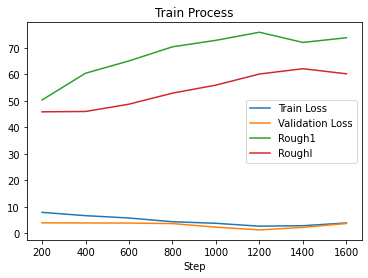

In [ ]:
#train_df.set_index('Step',inplace = True)
train_df.plot(title = 'Train Process')

In [ ]:
import akshare as ak
import time
time_start = time.time()  
stock_us_hist_min_em_df = ak.stock_us_hist_min_em(symbol="105.ATER",start_date='2022-07-01 09:32:00',end_date='2022-07-01 23:00:00')
print(stock_us_hist_min_em_df)
time_end = time.time()  
time_sum = time_end - time_start  
print(time_sum)

                     时间    开盘    收盘    最高    最低    成交量       成交额    最新价
0   2022-07-01 21:30:00  2.13  2.13  2.13  2.13      0       0.0  2.130
1   2022-07-01 21:31:00  2.13  2.13  2.13  2.13  89051  189678.0  2.130
2   2022-07-01 21:32:00  2.16  2.14  2.17  2.14  10443   23198.0  2.140
3   2022-07-01 21:33:00  2.15  2.15  2.15  2.14   3086    6623.0  2.140
4   2022-07-01 21:34:00  2.15  2.15  2.16  2.15   3711    7993.0  2.140
..                  ...   ...   ...   ...   ...    ...       ...    ...
86  2022-07-01 22:56:00  2.18  2.18  2.18  2.18    580    1276.0  2.201
87  2022-07-01 22:57:00  2.19  2.20  2.20  2.19  20829   45759.0  2.201
88  2022-07-01 22:58:00  2.20  2.20  2.20  2.20     86     189.0  2.201
89  2022-07-01 22:59:00  2.19  2.19  2.19  2.19    109     239.0  2.201
90  2022-07-01 23:00:00  2.19  2.19  2.19  2.19    906    1994.0  2.201

[91 rows x 8 columns]
0.8051636219024658


In [ ]:
import akshare as ak
time_start = time.time()
stock_yjyg_em_df = ak.stock_yjyg_em(date="20191231")
time_end = time.time()
time_sum = time_end - time_start  
print(time_sum)
print(stock_yjyg_em_df)

22.967284202575684
        序号    股票代码  股票简称           预测指标  \
0        1  300886  华业香料  扣除非经常性损益后的净利润   
1        2  300886  华业香料           营业收入   
2        3  600189   泉阳泉  归属于上市公司股东的净利润   
3        4  600189   泉阳泉  扣除非经常性损益后的净利润   
4        5  000980  ST众泰  归属于上市公司股东的净利润   
...    ...     ...   ...            ...   
3853  3854  603687   大胜达  归属于上市公司股东的净利润   
3854  3855  603687   大胜达  扣除非经常性损益后的净利润   
3855  3856  603687   大胜达           营业收入   
3856  3857  601975  招商南油           营业收入   
3857  3858  601975  招商南油            净利润   

                                                   业绩变动          预测数值  \
0        预计2019年1-12月扣除非经常性损益后的净利润盈利:3700万元,同比下降33.97%。  3.700000e+07   
1                 预计2019年1-12月营业收入:21,100万元,同比下降18.16%。  2.110000e+08   
2               预计2019年1-12月归属于上市公司股东的净利润亏损:148000万元左右。 -1.480000e+09   
3               预计2019年1-12月扣除非经常性损益后的净利润亏损:156000万元左右。 -1.560000e+09   
4     预计2019年1-12月归属于上市公司股东的净利润亏损:约1,080,000万元至1,150... -1.115000e+10   
...                       

In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.3 MB/s 
     |████████████████████████████████| 6.4 MB 16.3 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.28.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
import yfinance as yf

msft = yf.Ticker("MSFT")

msft.sustainability



,Value
2022-5,
palmOil,False
controversialWeapons,False
gambling,False
socialScore,8.06
nuclear,False
furLeather,False
alcoholic,False
gmo,False
catholic,False


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.datasets import fetch_20newsgroups
twenty = fetch_20newsgroups()

tfidf = TfidfVectorizer().fit_transform(twenty.data)
tfidf



<11314x130107 sparse matrix of type '<class 'numpy.float64'>'
	with 1787565 stored elements in Compressed Sparse Row format>

In [ ]:
#-*- encoding:utf-8 -*-
import jieba
from gensim import corpora, models, similarities
import heapq
import os
import json
import pandas as pd
import operator

class Qa:
    stopwords_file = 'stopwords.txt'
    stopWordsList = '停用词.txt'

    with open(r'实验室01项目.txt', 'r', encoding='utf-8') as file:

        content_list = file.readlines()  # 读取所有行并返回列表
    questionList = [x.strip() for x in content_list]
    print(questionList)

    # load stop_words
    def load_stop_words(self)->list:
        with open(self.stopwords_file, mode="r", encoding="utf-8") as f:
            content = f.read()
        content_list = content.split('\n')
        self.stopWordsList = content_list
        return self.stopWordsList

    #delete question list stopwords 删除词组列表中的停用词
    def delete_stop_words(self, wordsList:list) -> list:
        """
        :param wordsList: 列表
        :return: list
        """
        newWords = []
        for word in wordsList:
            if word not in self.stopWordsList:
                newWords.append(word)
        return newWords

    #question list
    def get_question_list(self):
        """
        可从数据库文本等 获取
        :return: list
        """
        questionList = self.questionList

        #将question list 分词并去除停用词
        result = [self.delete_stop_words(jieba.lcut(val)) for val in questionList]
        #print(result)
        return result

    #run
    def run(self, question: str) -> list:

        #1. 加载语料
        #load stop words
        self.load_stop_words()
        #get question list
        questionList = self.get_question_list()

        #delete stop words for input question
        question = self.delete_stop_words(wordsList=jieba.lcut(question))

        #2. 生成词典
        # 生成gensim 词典
        dictionary = corpora.Dictionary(questionList)
        print(dictionary)
        #3. 通过doc2bow 稀疏向量生成语料库
        corpus = [dictionary.doc2bow(item) for item in questionList]
        #4. 计算tf值
        tf = models.TfidfModel(corpus)
        # 5.通过token2id得到特征数（特征数：字典里面的键的个数）
        #dictionary.token2id: {'title': id}
        numFeatures = len(dictionary.token2id.keys())
        #计算稀疏矩阵相似度 建立索引
        index = similarities.MatrixSimilarity(tf[corpus], num_features=numFeatures)

        #生成新的稀疏向量  根据原有的dictionary 生成新的 稀疏向量
        newDec = dictionary.doc2bow(question)
        # result
        simsQuestion = index[tf[newDec]]

        #
        result = []
        #
        result1 = []
        for val in list(enumerate(simsQuestion)):
            if val[1] < 0.05:
                result1.append({
                    '项目': str(self.questionList[val[0]]),
                    '相似度': val[1],
                    '位置': val[0],
                })
        print(result1)
        file = open('data5.txt', 'w')
        file.write(str(result1));
        file.close()
        #
        for val in list(enumerate(simsQuestion)):
            if val[1] > 0:
                result.append({
                    '项目': str(self.questionList[val[0]]),
                    '相似度': val[1],
                    '位置': val[0],
                })
        print(result)
        file = open('data.txt', 'w')
        file.write(str(result));
        file.close()
        exit()

if __name__ == '__main__':
    Qa = Qa()
    text = open("实验室01研究方向和目标.txt", encoding="utf-8").read()
    Qa.run(text)


In [ ]:
import nltk
nltk.download('stopwords')
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from nltk.corpus import stopwords
import numpy as np
import numpy.linalg as LA

train_set = ['Research firm Argus has reported a rise in the number of clients seeking its analysis of the UK\'s stock market in the month of November, compared with the previous 12 months, which saw a sharp fall in the value of shares across the board.']
test_set = ['Gross domestic product (GDP) fell by 0.3% in April 2022, following a fall of 0.1% in March 2022; UK GDP grew by 0.2% in the three months to April 2022.']
stopWords = stopwords.words('english')

vectorizer = CountVectorizer(stop_words = stopWords)
#print vectorizer
transformer = TfidfTransformer()
#print transformer

trainVectorizerArray = vectorizer.fit_transform(train_set).toarray()
testVectorizerArray = vectorizer.transform(test_set).toarray()
#print 'Fit Vectorizer to train set', trainVectorizerArray
#print 'Transform Vectorizer to test set', testVectorizerArray
cx = lambda a, b : round(np.inner(a, b)/(LA.norm(a)*LA.norm(b)), 3)

for vector in trainVectorizerArray:
    #print(vector)
    for testV in testVectorizerArray:
        #print(testV)
        cosine = cx(vector, testV)
        print("1")
        print(cosine)

transformer.fit(trainVectorizerArray)

transformer.transform(trainVectorizerArray).toarray()

#print(transformer.fit(testVectorizerArray))

tfidf = transformer.transform(testVectorizerArray)
#print(tfidf.todense())

1
0.346


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


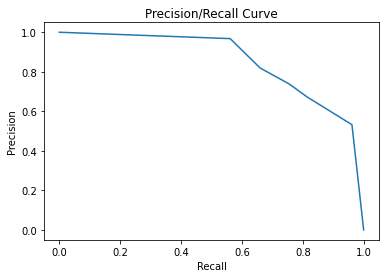

In [ ]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
#from sklearn.metrics import precision_recall_curve
#from sklearn.utils.fixes import signature
plt.figure("P-R Curve")
plt.title('Precision/Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
#y_true为样本实际的类别，y_scores为样本为正例的概率

precision = [1,0.9677,0.8194,0.7387,0.6735,0.5323,0]
recall = [0,0.5615,0.6596,0.7550,0.8134,0.9615,1]
plt.plot(recall,precision)
plt.show()



In [ ]:
#evaluating metric use the rouge_score
import numpy as np
from rouge_score import rouge_scorer, scoring
def compute(predictions, references, rouge_types=None, use_agregator=True, use_stemmer=False):
    if rouge_types is None:
        rouge_types = ["rouge1", "rougeL"]

    scorer = rouge_scorer.RougeScorer(rouge_types=rouge_types, use_stemmer=True)
    if use_agregator:
        aggregator = scoring.BootstrapAggregator()
    else:
        scores = []
    for ref, pred in zip(references, predictions):
        score = scorer.score(ref, pred)
        if use_agregator:
            aggregator.add_scores(score)
        else:
            scores.append(score)
    if use_agregator:
        result = aggregator.aggregate()
    else:
        result = {}
        for key in scores[0]:
            result[key] = list(score[key] for score in scores)

    return result